In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Inicio

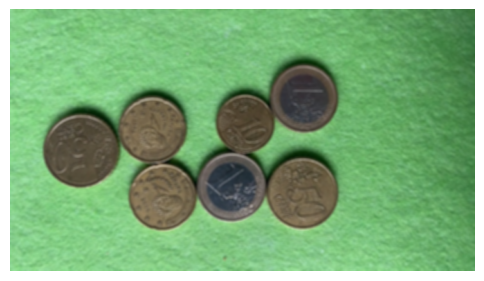

In [2]:
img = cv2.imread(f'../data/images/coins.jpg')
img = cv2.resize(img, None, fx = .7, fy=.7)

imgPre = cv2.GaussianBlur(img, (5, 5), 2)
# imgPre = cv2.medianBlur(img, 21)
# imgPre = cv2.bilateralFilter(img, d=30, sigmaColor=100, sigmaSpace=30)

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(imgPre, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()


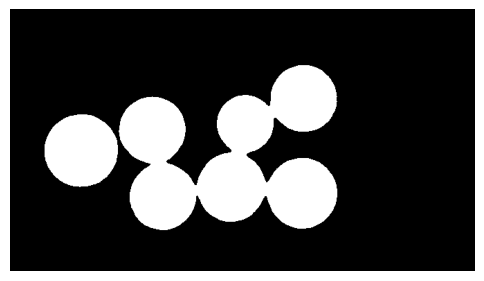

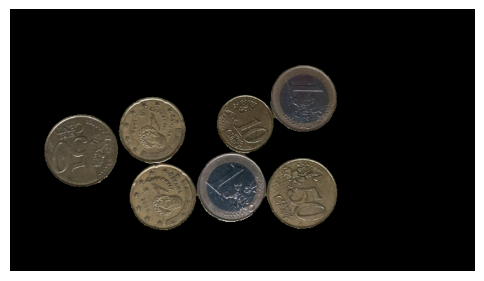

In [3]:
hsv_image = cv2.cvtColor(imgPre, cv2.COLOR_BGR2HSV)

lower_green = np.array([35, 50, 10])  # Límite inferior (H, S, V)
upper_green = np.array([85, 255, 255])  # Límite superior (H, S, V)

# Crear una máscara que solo tenga en cuenta los colores dentro del rango
mask = cv2.inRange(hsv_image, lower_green, upper_green)
inverse_mask = cv2.bitwise_not(mask)

result = cv2.bitwise_and(img, img, mask=inverse_mask)

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(inverse_mask, cmap='gray')
ax.axis('off')
plt.show()

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

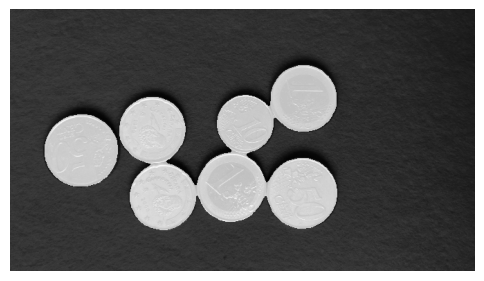

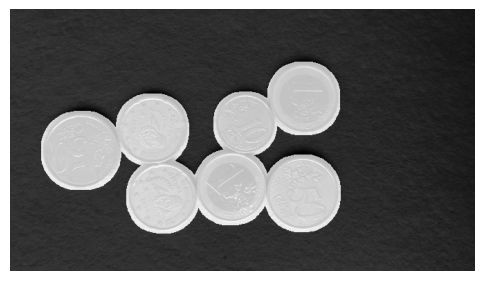

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(inverse_mask,cv2.MORPH_OPEN,kernel, iterations = 4) # Erosion followed by Dilation

alpha = 0.7
beta = 1 - alpha
gamma = 0  # Valor adicional agregado a cada píxel

imagen_superpuesta = cv2.addWeighted(gray, beta, opening, alpha, gamma)

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(imagen_superpuesta, cmap='gray')
ax.axis('off')
plt.show()

sure_bg = cv2.dilate(opening,kernel,iterations=5)

alpha = 0.7
beta = 1 - alpha
gamma = 0  # Valor adicional agregado a cada píxel

imagen_superpuesta = cv2.addWeighted(gray, beta, sure_bg, alpha, gamma)

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(imagen_superpuesta, cmap='gray')
ax.axis('off')
plt.show()

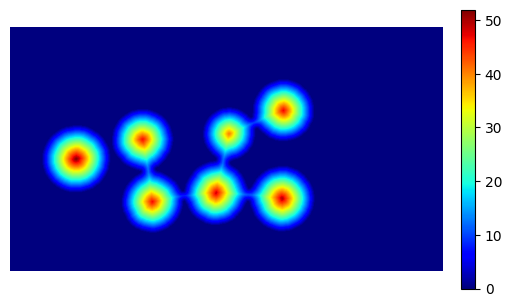

In [5]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)

f, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(dist_transform, cmap='jet')
ax.axis('off')
cbar = f.colorbar(im, fraction=.03, pad=0.04)    # Añade la barra de colores
plt.show()

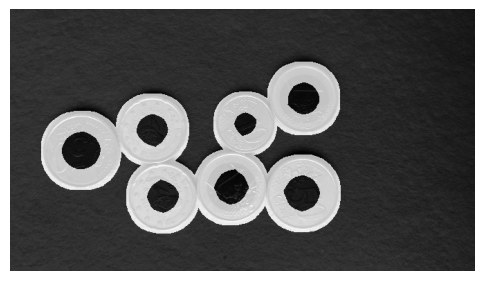

In [6]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

alpha = 0.7
beta = 1 - alpha
gamma = 0  # Valor adicional agregado a cada píxel

imagen_superpuesta = cv2.addWeighted(gray, beta, unknown, alpha, gamma)

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(imagen_superpuesta, cmap='gray')
ax.axis('off')
plt.show()

[1 2 3 4 5 6 7 8]


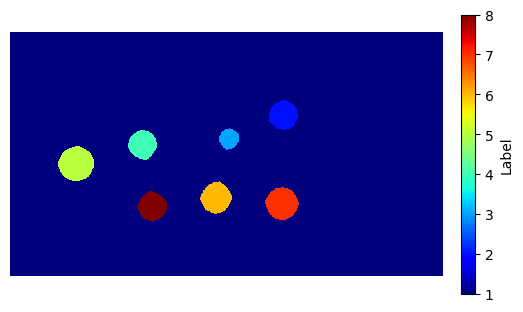

In [7]:
# matriz que contiene los resultados de la segmentación.
# Cada valor corresponde a enteros que representan diferentes labels
_, labels = cv2.connectedComponents(sure_fg)

labels = labels+1
print(np.unique(labels))

f, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(labels, cmap='jet', interpolation='nearest')
f.colorbar(im, ax=ax, label='Label', ticks=np.arange(labels.max() + 1), fraction=.03, pad=0.04)  
ax.axis('off')
plt.show()

In [8]:
print(labels)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


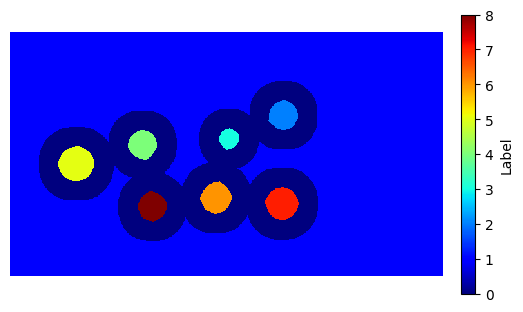

In [9]:
labels[unknown==255] = 0 # Para reasignar etiquetas a las áreas inciertas (unknown)
f, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(labels, cmap='jet', interpolation='nearest')
f.colorbar(im, ax=ax, label='Label', ticks=np.arange(labels.max() + 1), fraction=.03, pad=0.04)  
ax.axis('off')
plt.show()

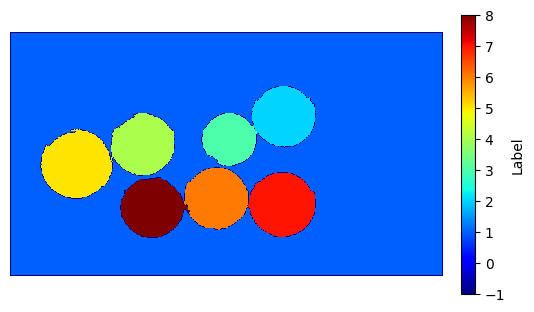

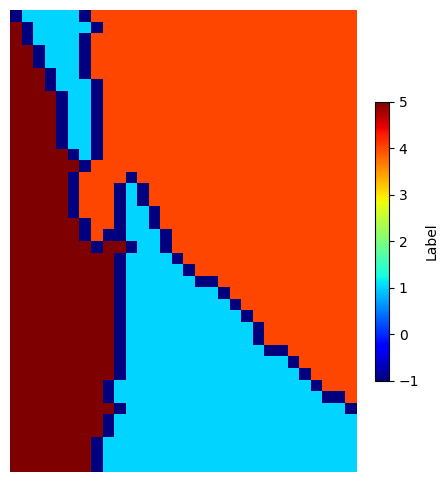

In [43]:
markers = cv2.watershed(img,labels) # -1 para los píxeles entre las regiones segmentadas

f, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(markers, cmap='jet', interpolation='nearest')
ticks_ = np.linspace(markers.min() , markers.max(), abs(markers.min() - markers.max())+1)
f.colorbar(im, ax=ax, label='Label', ticks=ticks_, fraction=.03, pad=0.04)  
ax.axis('off')
plt.show()


markers_ = markers[180:220, 150:180]
f, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(markers_, cmap='jet', interpolation='nearest')
ticks_ = np.linspace(markers.min() , markers.max(), abs(markers.min() - markers.max())+1)
f.colorbar(im, ax=ax, label='Label', ticks=ticks_, fraction=.03, pad=0.04)  
ax.axis('off')
plt.show()

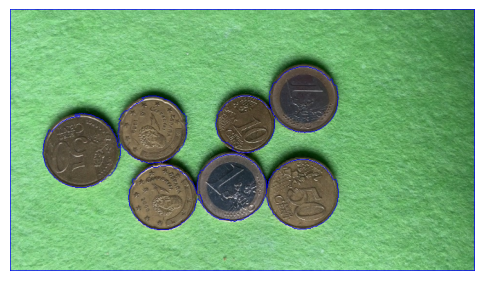

In [ ]:
img[markers == -1] = [255,0,0] # -1 para los píxeles entre las regiones segmentadas

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()